In [22]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from scipy import signal

In [23]:
im = plt.imread(r'D:\py\python\Computer Vision\Image\bird.png')[:,:,:3]

In [24]:
imGray = cv2.cvtColor(im, cv2.COLOR_RGB2GRAY)

In [25]:
smoothingMask = np.ones((25,25))/225

In [26]:
imBlurred = signal.convolve2d(imGray, smoothingMask, boundary='symm', mode='same')

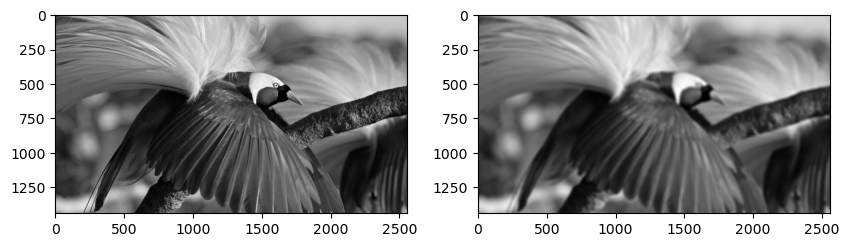

In [27]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,15))
ax1.imshow(imGray, cmap='gray')
ax2.imshow(imBlurred, cmap='gray')

In [28]:
xMask = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
yMask = xMask.T.copy()

In [29]:
fx = signal.convolve2d(imGray, xMask, boundary='symm',mode='same')
fy = signal.convolve2d(imGray, yMask, boundary='symm',mode='same')

In [30]:
Gm = (fx ** 2 + fy ** 2) ** 0.5

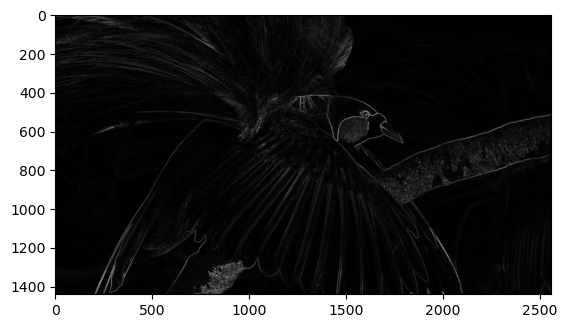

In [31]:
plt.imshow(Gm,cmap='gray')

In [32]:
th = Gm.max() - 4 * Gm.std()

In [33]:
th

1.5983811700677228

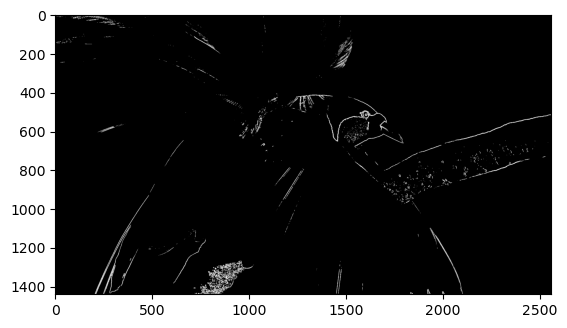

In [34]:
E = Gm > th
plt.imshow(Gm>0.5, cmap='gray')

In [38]:
imSharped = imBlurred + 5 * Gm

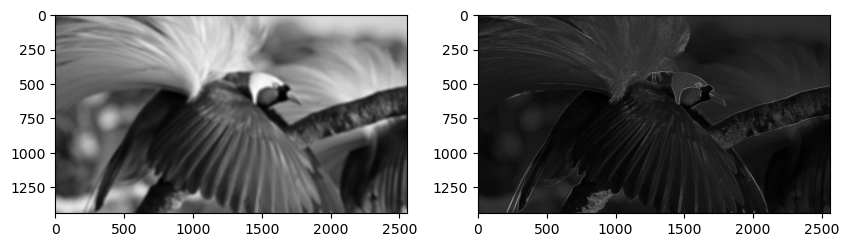

In [39]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,15))
ax1.imshow(imBlurred, cmap='gray')
ax2.imshow(imSharped, cmap='gray')

In [37]:
#Image Sharpening
imSharped = imBlurred + 0.5 * Gm